In [53]:
import ast
import pandas as pd

import numpy as np

from plotnine import *
import matplotlib.pyplot as plt

from sklearn.manifold import MDS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, cohen_kappa_score, f1_score, matthews_corrcoef, log_loss, plot_confusion_matrix, roc_auc_score, plot_roc_curve

import sys
sys.path.append('../')
from utils.cv_helpers import *

In [54]:
with open('../her2-status_config.json', 'r') as f:
    config = ast.literal_eval(f.read())

In [55]:
cv_scheme = RepeatedStratifiedKFold(n_splits=config['FOLDS'], n_repeats=config['REPEATS'], random_state=config['SEED'])
palette = ["#C9E5D5", "#a7d6bb", "#1cbd9c", "#4FA775", "#2C5D41"]
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Kappa': make_scorer(cohen_kappa_score),
    'MCC': make_scorer(matthews_corrcoef),
    'LL': make_scorer(log_loss),
    'F1': make_scorer(f1_score),
    'AUC': make_scorer(roc_auc_score)
}

In [56]:
X = pd.read_csv(config['TRAIN_DATA_FILE']).set_index('sample_id')
y = pd.read_csv(config['Y_TRAIN_FILE']).set_index('sample_id')

X_holdout = pd.read_csv(config['HOLDOUT_DATA_FILE']).set_index('sample_id')
y_holdout = pd.read_csv(config['Y_HOLDOUT_FILE']).set_index('sample_id')

all_X = pd.concat([X, X_holdout])
all_y = pd.concat([X, y_holdout])

high_purity = all_X[all_X['Purity'] >= 0.6].index
low_purity = all_X[all_X['Purity'] < 0.6].index

high_ploidy = all_X[all_X['Ploidy'] >= 3].index
low_ploidy = all_X[all_X['Ploidy'] < 3].index

high_coverage = all_X[all_X['Tumour Average Depth'] >= 49].index
low_coverage = all_X[all_X['Tumour Average Depth'] < 49].index

In [57]:
dataset = pd.merge(X, y, right_index=True, left_index=True)
dataset['Class'] = pd.Categorical(dataset['Class'], categories=[0, 1])

<AxesSubplot:>

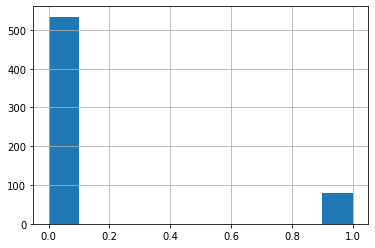

In [58]:
dataset['Class'].hist()

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 9 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


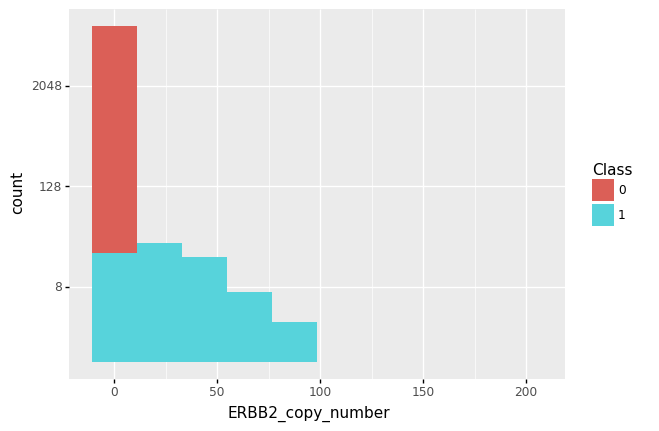

<ggplot: (8778190903305)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


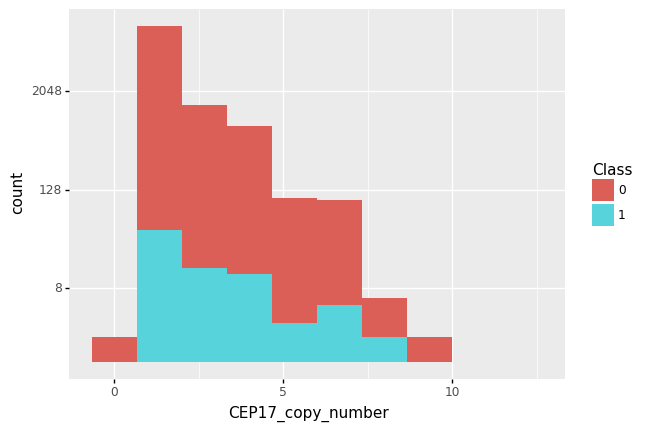

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ggplot: (8778189254065)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 10 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


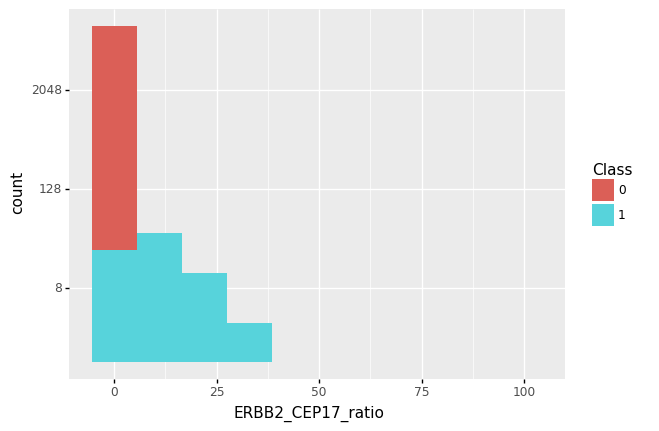

<ggplot: (8778189070401)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 9 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


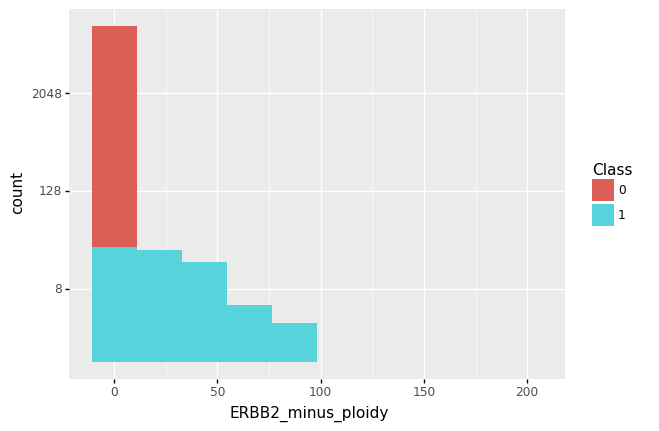

<ggplot: (8778188998297)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


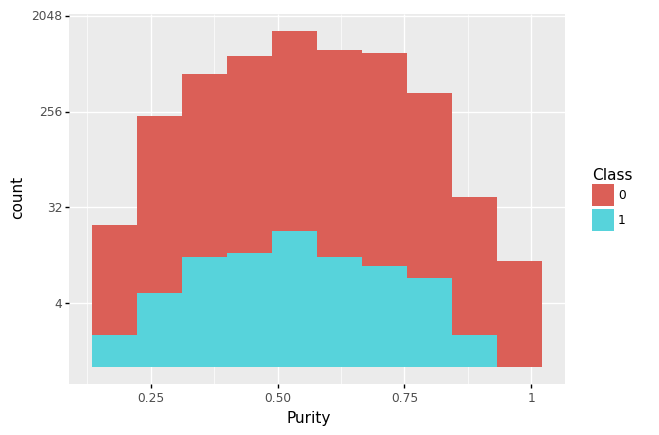

<ggplot: (8778190094161)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


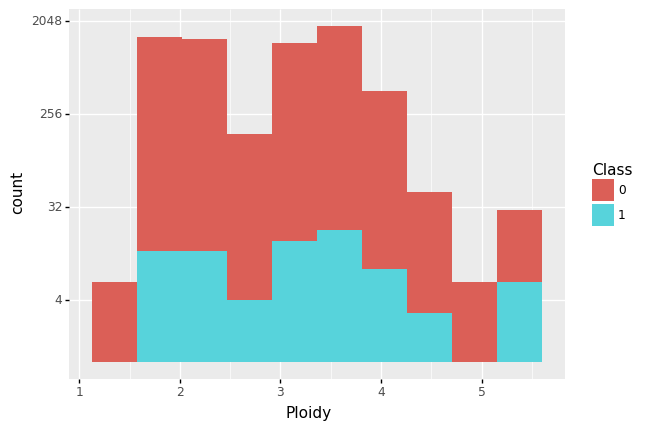

<ggplot: (8778189160773)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 5 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


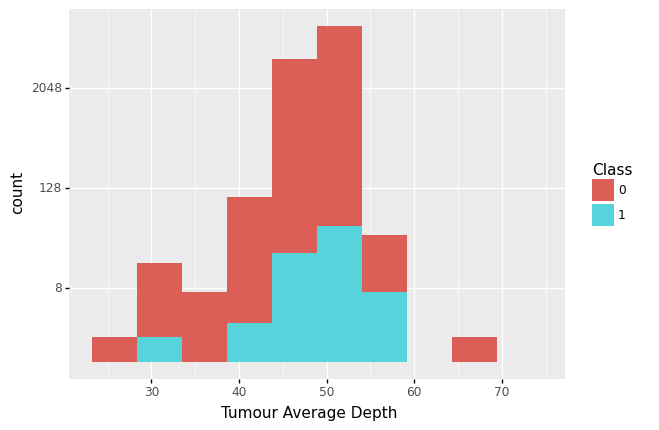

<ggplot: (8778188831581)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


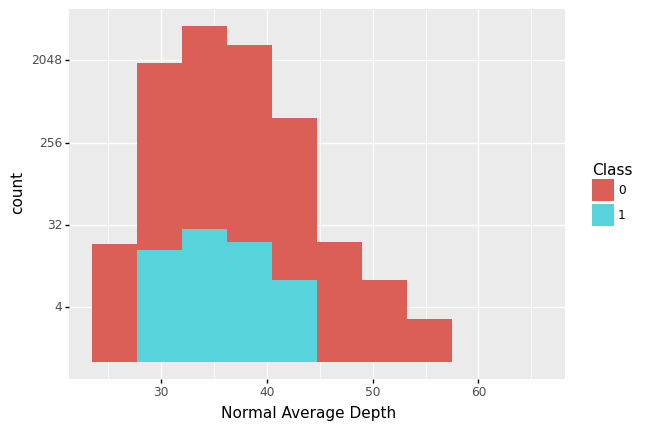

<ggplot: (8778188656157)>


In [59]:
for column in X.columns:
     print((ggplot(dataset, aes(x=column, fill='Class')) +
          geom_histogram(bins=10) +
          scale_y_continuous(trans='log2')
     ))

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


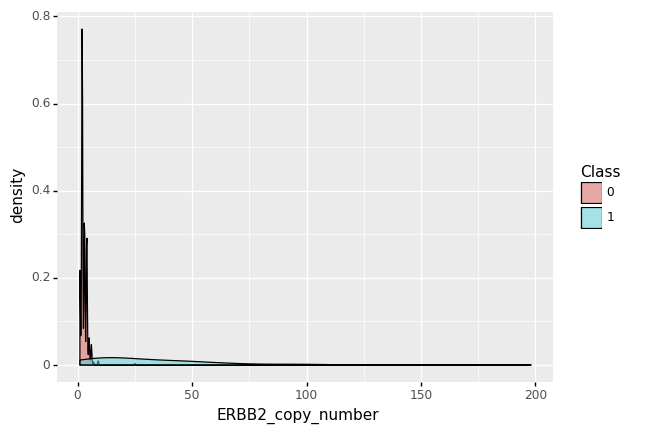

<ggplot: (8778188789121)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


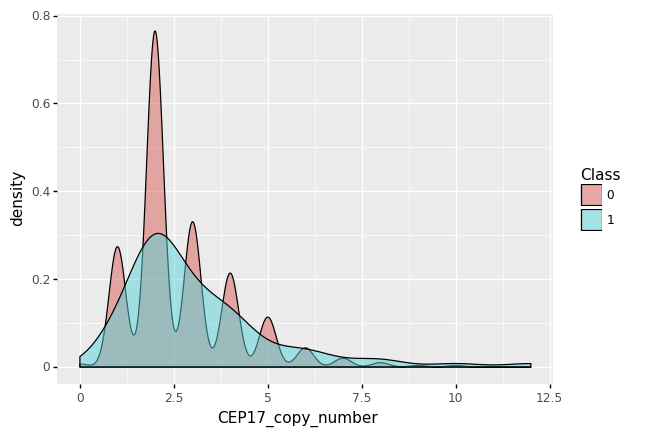

<ggplot: (8778189512589)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


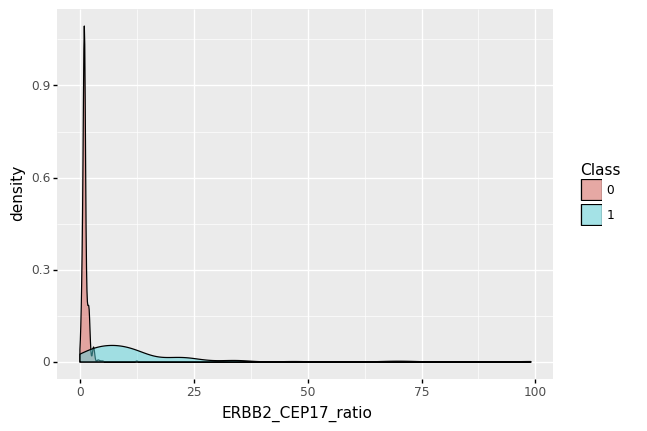

<ggplot: (8778189027565)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


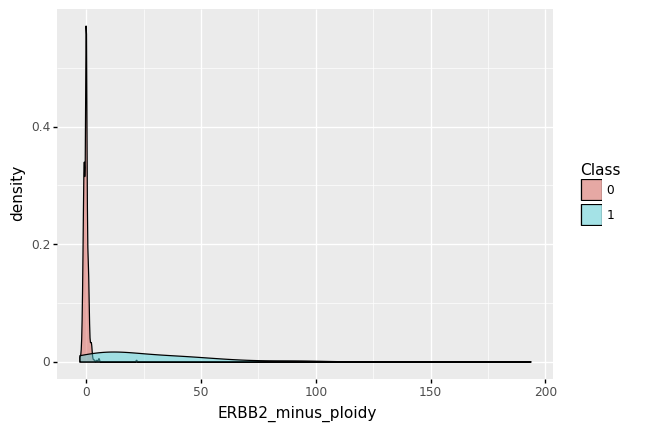

<ggplot: (8778188962477)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


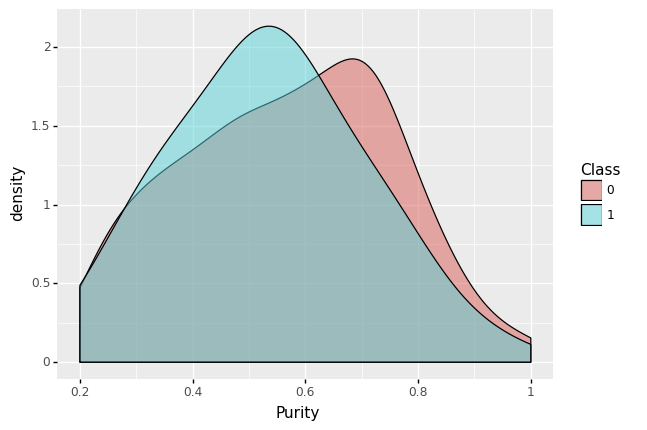

<ggplot: (8778189114345)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


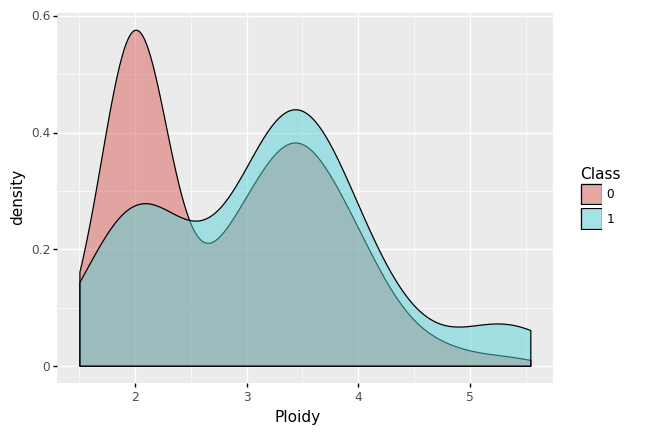

<ggplot: (8778189382521)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


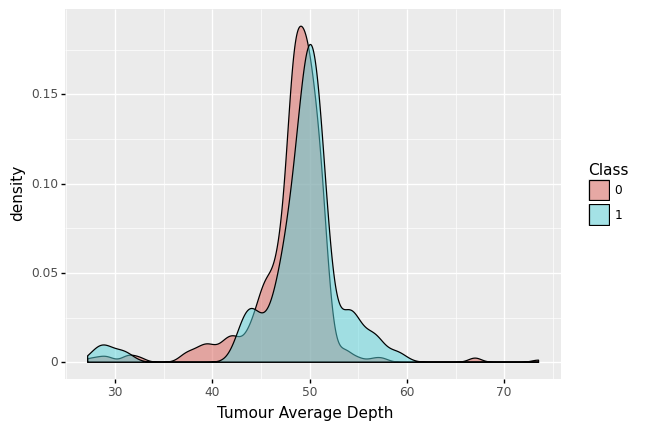

<ggplot: (8778188874461)>


/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


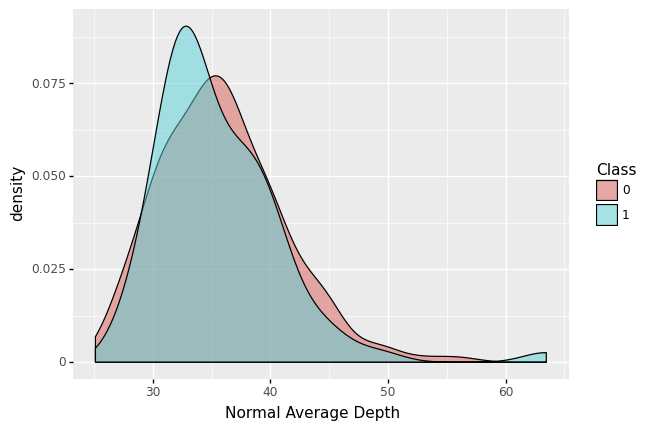

<ggplot: (8778190215365)>


In [60]:
for column in X.columns:
     print((ggplot(dataset, aes(x=column, fill='Class')) +
          geom_density(alpha=0.5)
     ))

In [61]:
X = X.drop(['Tumour Average Depth', 'Normal Average Depth'], axis=1)

In [63]:
import umap

In [64]:
reducer = umap.UMAP()

In [66]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [77]:
import seaborn as sns

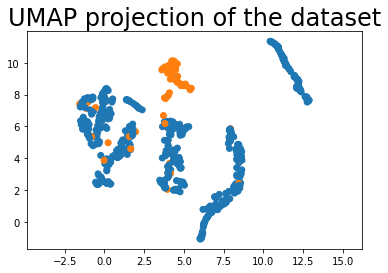

In [89]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y.Class]);
plt.gca().set_aspect('equal', 'datalim');
plt.title('UMAP projection of the dataset', fontsize=24);

In [90]:
embedding = MDS(n_components=2, random_state=0)
X_transformed = pd.DataFrame(embedding.fit_transform(X_scaled), columns=['Component 1', 'Component 2'])
X_transformed['sample_id'] = X.index
X_transformed = X_transformed.set_index('sample_id')
X_transformed = X_transformed.join(y, how='inner')

In [91]:
X_transformed['Class'] = pd.Categorical(X_transformed['Class'], categories=[0, 1])

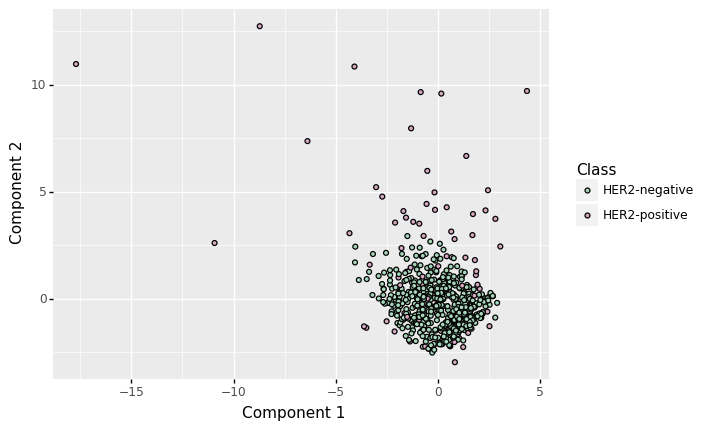

<ggplot: (8778164323733)>

In [93]:
p = (ggplot(X_transformed, aes(x='Component 1', y='Component 2', fill='Class')) + \
    geom_point() +
    scale_fill_manual(("#a7d6bb", "#D6A8C2"), labels=('HER2-negative', 'HER2-positive'))
);

p

In [94]:
best_params_dt = DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=1, min_samples_leaf=1, min_samples_split=2).fit(X, y)

In [95]:
high_purity_df = estimator_cv_evaluation(X=X[X.index.isin(high_purity)], 
                                  y=y[y.index.isin(high_purity)], 
                                  estimator_name='High purity',
                                  estimator_object=best_params_dt,
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

low_purity_df = estimator_cv_evaluation(X=X[X.index.isin(low_purity)], 
                                  y=y[y.index.isin(low_purity)], 
                                  estimator_name='Low purity',
                                  estimator_object=best_params_dt,
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

high_ploidy_df = estimator_cv_evaluation(X=X[X.index.isin(high_ploidy)], 
                                  y=y[y.index.isin(high_ploidy)], 
                                  estimator_name='High ploidy',
                                  estimator_object=best_params_dt,
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

low_ploidy_df = estimator_cv_evaluation(X=X[X.index.isin(low_ploidy)], 
                                  y=y[y.index.isin(low_ploidy)], 
                                  estimator_name='Low ploidy',
                                  estimator_object=best_params_dt,
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

high_coverage_df = estimator_cv_evaluation(X=X[X.index.isin(high_coverage)], 
                                  y=y[y.index.isin(high_coverage)], 
                                  estimator_name='High coverage',
                                  estimator_object=best_params_dt,
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

low_coverage_df = estimator_cv_evaluation(X=X[X.index.isin(low_coverage)], 
                                  y=y[y.index.isin(low_coverage)], 
                                  estimator_name='Low coverage',
                                  estimator_object=best_params_dt,
                                  cv_scheme=cv_scheme,
                                  scoring=scoring
                                  )

comparison_df = pd.concat([high_purity_df, low_purity_df, high_ploidy_df, low_ploidy_df, high_coverage_df, low_coverage_df])
